In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import our cleaned and dummied data
data = pd.read_csv('data/clean_data_with_dummies.csv')
data.columns

/var/folders/bl/bhy6kgn16kx9r1j535zcctcw0000gn/T/ipykernel_19175/809678314.py:2: DtypeWarning: Columns (1,2,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/clean_data_with_dummies.csv')


Index(['Age', 'City_Eugene', 'City_Springfield', 'DayOfMonth', 'DayOfWeek',
       'DayOfYear', 'Gender_female', 'Gender_male', 'Gender_non_binary',
       'Gender_trans_female', 'Gender_trans_male', 'Hour', 'Month',
       'Race_alaska native', 'Race_american indian',
       'Race_american indian/alaska native', 'Race_asian',
       'Race_black/african american', 'Race_hispanic/latino',
       'Race_native hawaiian/other pacific islander', 'Race_other',
       'Race_two or more races', 'Race_white',
       'Reason for Dispatch_Check Welfare', 'Reason for Dispatch_Counseling',
       'Reason for Dispatch_EMS Assist', 'Reason for Dispatch_Fire Assist',
       'Reason for Dispatch_Police Assist',
       'Reason for Dispatch_Public Assist',
       'Reason for Dispatch_Suicidal Subject', 'Reason for Dispatch_Transport',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Year', 'cloudcover', 'conditions_Clear', 'conditions_Overcast',
       'conditions_Partia

In [3]:
# Import our OLS feature weights
weights = pd.read_csv('data/OLS_coefficients.csv')
weights

,Feature,Coefficient
0,"conditions_Rain, Freezing Drizzle/Freezing Rai...",23.738971
1,snowdepth,9.668829
2,"conditions_Snow, Rain, Partially cloudy",-9.062100
3,"conditions_Rain, Partially cloudy",-6.103032
4,"conditions_Snow, Rain",5.724238
5,"conditions_Rain, Overcast",-5.563554
6,conditions_Rain,-5.200094
7,"conditions_Rain, Freezing Drizzle/Freezing Rai...",-5.087978
8,solarenergy,3.106629
9,sunrise_hour,-2.840731


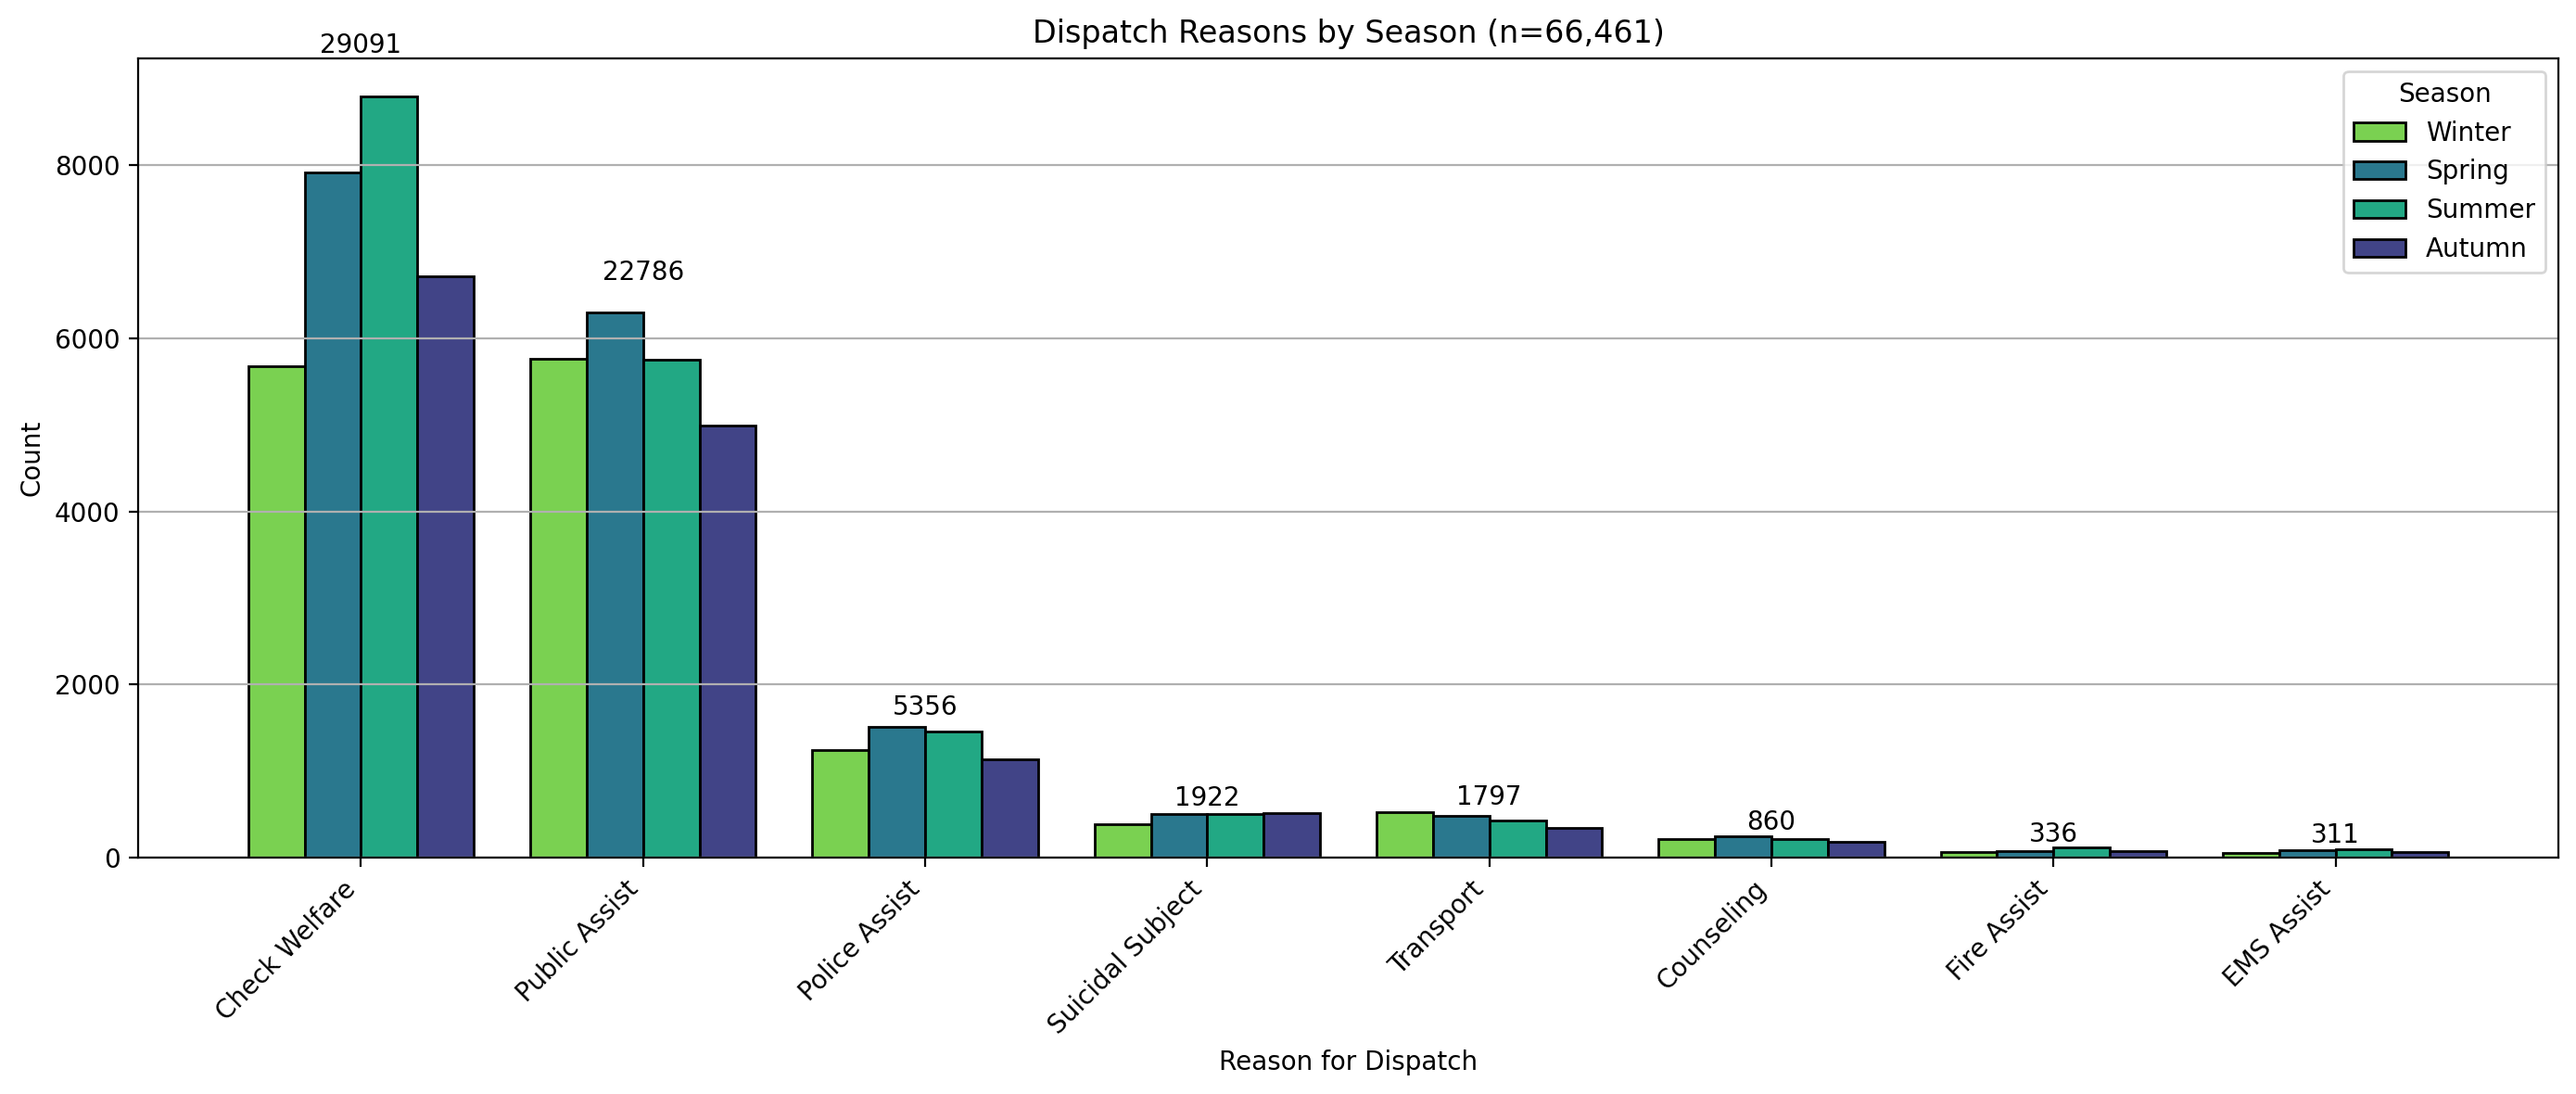

In [4]:
# Create a list of 'Reason for Dispatch' categories
reasons = [
    'Reason for Dispatch_Check Welfare', 'Reason for Dispatch_Counseling',
    'Reason for Dispatch_EMS Assist', 'Reason for Dispatch_Fire Assist',
    'Reason for Dispatch_Police Assist',
    'Reason for Dispatch_Public Assist',
    'Reason for Dispatch_Suicidal Subject', 'Reason for Dispatch_Transport'
]

# Create a list of seasons starting with Winter
seasons = ['Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Autumn']

# Initialize a DataFrame to aggregate the counts
agg_data = pd.DataFrame(columns=seasons, index=reasons)

# Calculate counts for each combination of reason and season
for reason in reasons:
    for season in seasons:
        agg_data.loc[reason, season] = (data[reason] & data[season]).sum()

# Calculate the total number of calls per reason
agg_data['Total'] = agg_data.sum(axis=1)

# Sort the reasons by the total number of calls
agg_data = agg_data.sort_values(by='Total', ascending=False)

# Remove the 'Total' column as it is no longer needed for plotting
agg_data = agg_data.drop(columns='Total')

# Summing up the occurrences of each reason for dispatch
reason_counts = data[reasons].sum()

# Sorting the reasons by their counts
reason_counts_sorted = reason_counts.sort_values(ascending=False)

# Remove the prefix 'Reason for Dispatch_' from each label
reason_labels = reason_counts_sorted.index.str.replace('Reason for Dispatch_', '')

# Using Seaborn's color palette 'viridis' to define colors for each season
custom_palette = {
    'Season_Autumn': sns.color_palette("viridis", 4)[0],  # First color in Viridis for Autumn
    'Season_Spring': sns.color_palette("viridis", 4)[1],  # Second color in Viridis for Spring
    'Season_Summer': sns.color_palette("viridis", 4)[2],  # Third color in Viridis for Summer
    'Season_Winter': sns.color_palette("viridis", 4)[3]   # Fourth color in Viridis for Winter
}

# Plotting
fig, ax = plt.subplots(figsize=(14, 6), dpi=200)  # Increase DPI for higher resolution

# Set the positions and width for the bars
bar_width = 0.2
index = range(len(agg_data))

# Plot each season's bars with custom color palette
for i, season in enumerate(seasons):
    bar_positions = [p + bar_width * i for p in index]
    bars = ax.bar(bar_positions, agg_data[season], bar_width, edgecolor='black', label=season.split('_')[1], color=custom_palette[season])

# Add labels, title, and legend
ax.set_xlabel('Reason for Dispatch')
ax.set_ylabel('Count')
ax.set_title('Dispatch Reasons by Season (n=66,461)')
ax.set_xticks([p + 1.5 * bar_width for p in index])
ax.set_xticklabels(reason_labels, rotation=45, ha='right')
ax.legend(title='Season')
plt.grid(axis='y')

# Labeling each reason with its total count above the bars, adjusting position dynamically
for i, (reason, total) in enumerate(reason_counts_sorted.items()):
    bar_height = max(agg_data.iloc[i])
    ax.text(i + 1.5 * bar_width, bar_height + 0.05 * bar_height, str(int(total)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

/var/folders/bl/bhy6kgn16kx9r1j535zcctcw0000gn/T/ipykernel_19175/1032789425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['AbsCoefficient'] = top_features['Coefficient'].abs()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

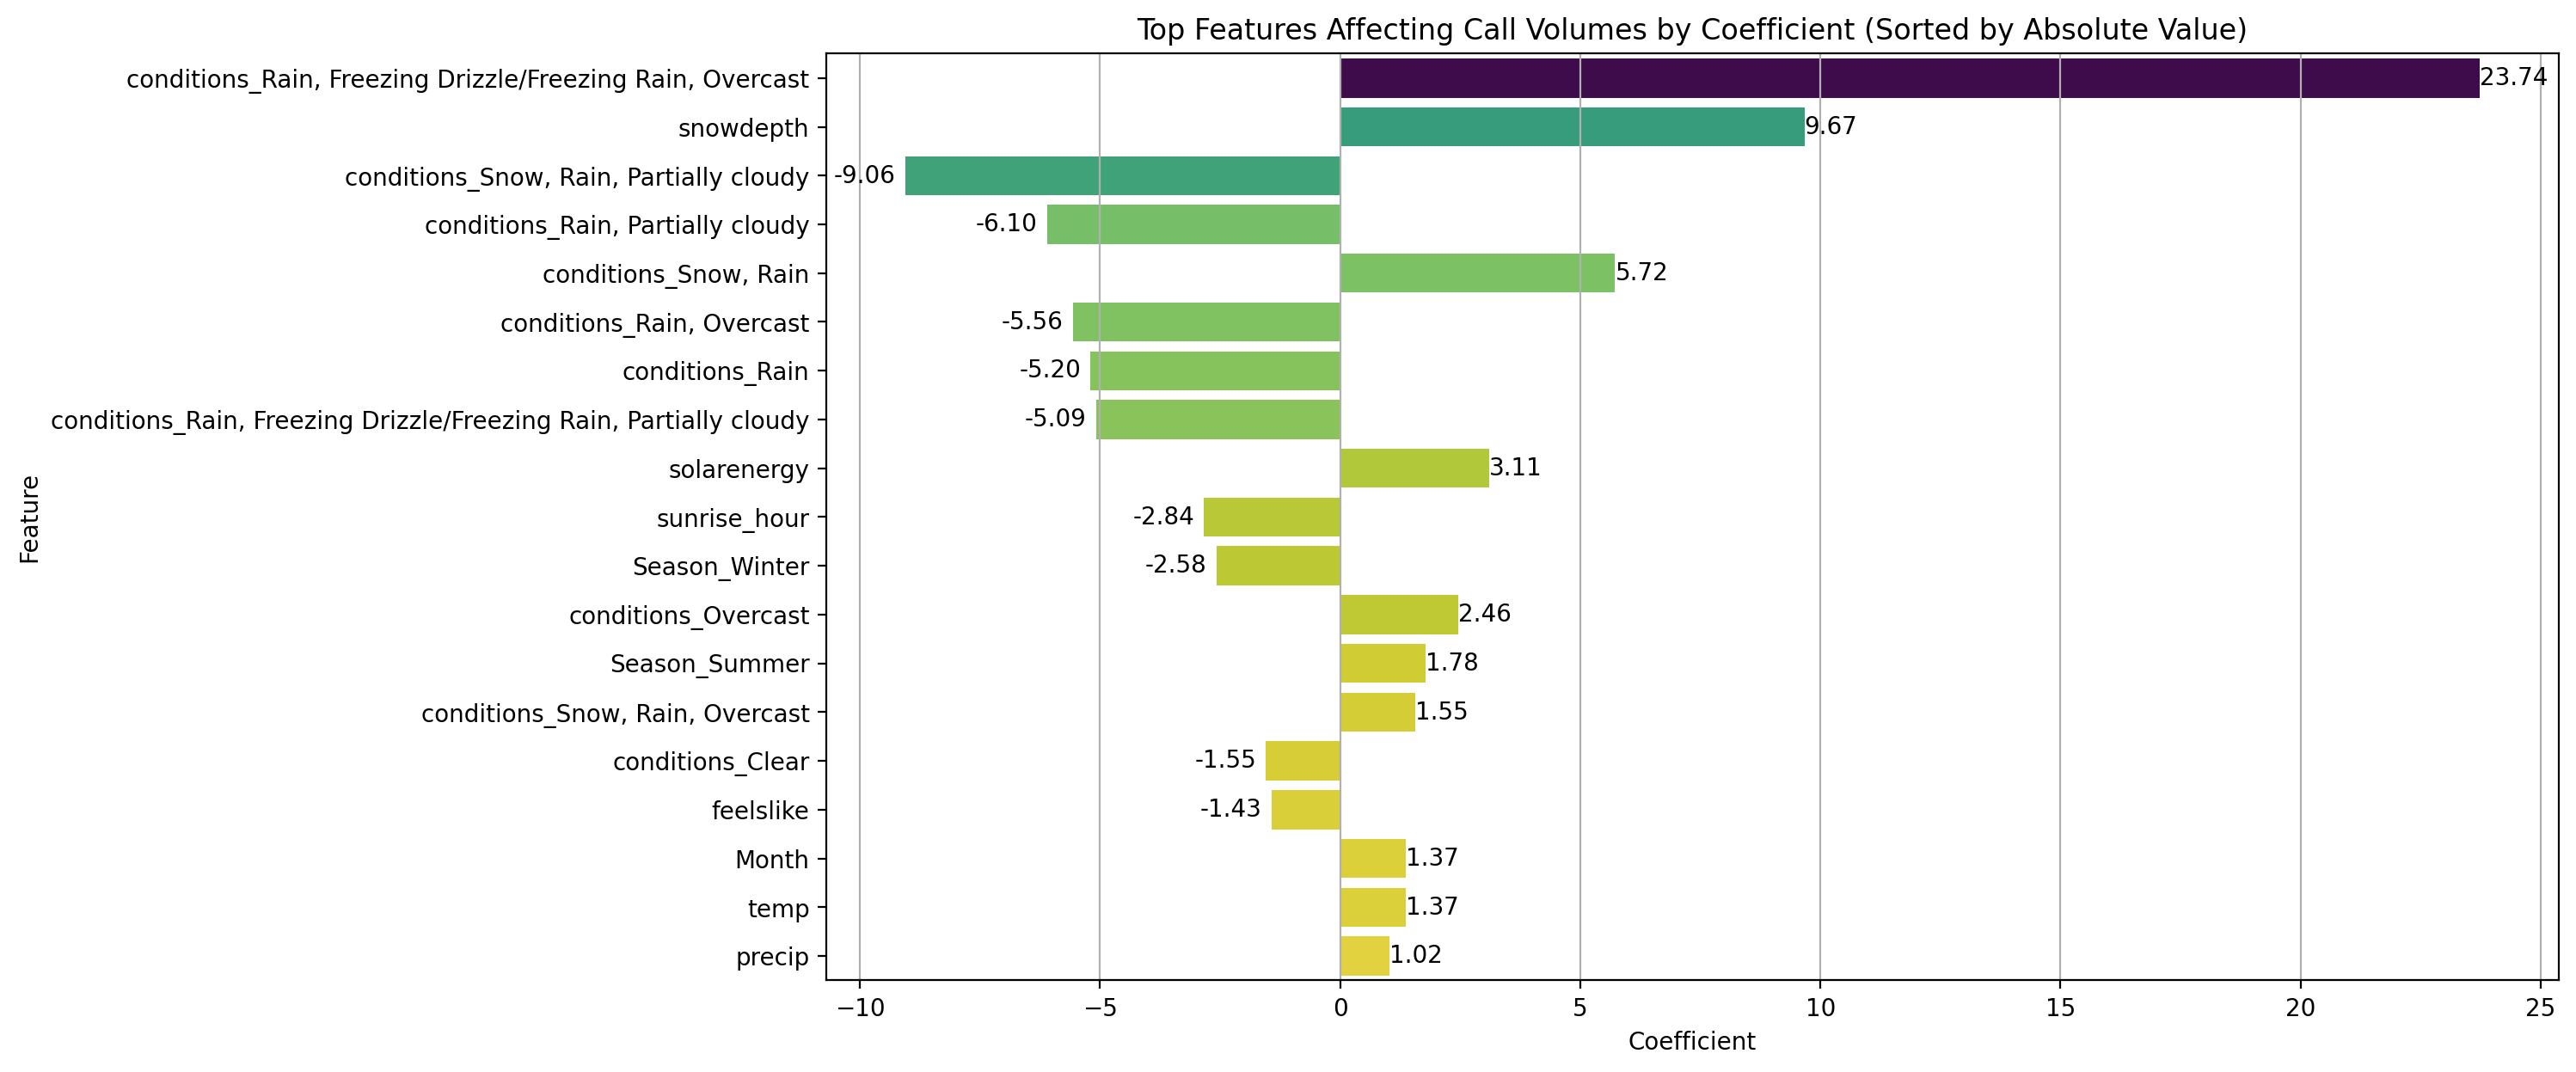

In [5]:
# Selecting the top _ weights
top_features = weights.head(19)

# Add a column for absolute coefficient values
top_features['AbsCoefficient'] = top_features['Coefficient'].abs()

# Sort by absolute coefficient values
sorted_features = top_features.sort_values(by='AbsCoefficient', ascending=False)

# Create a colormap that spans from the minimum to maximum absolute coefficient values
norm = plt.Normalize(sorted_features['AbsCoefficient'].min(), sorted_features['AbsCoefficient'].max())
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
sm.set_array([])
colors = sm.to_rgba(sorted_features['AbsCoefficient'])

# Plot combined features with a single palette for positive and negative coefficients
plt.figure(figsize=(13, 7), dpi=200)
bars = sns.barplot(x='Coefficient', y='Feature', data=sorted_features, palette=colors)

plt.title('Top Features Affecting Call Volumes by Coefficient (Sorted by Absolute Value)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.grid(axis='x')

# Labeling each bar with its coefficient value
for bar, coef in zip(bars.patches, sorted_features['Coefficient']):
    plt.text(bar.get_width() if coef > 0 else bar.get_width() - 0.2, 
             bar.get_y() + bar.get_height() / 2, 
             f'{coef:.2f}', 
             ha='left' if coef > 0 else 'right',
             va='center', 
             color='black')

# Add a colorbar
cbar = plt.colorbar(sm, orientation='horizontal', label='Absolute Coefficient Value', pad=0.2)
plt.tight_layout()
plt.show()